In [1]:
import pandas as pd

train_df = pd.read_csv('train_df.csv')
valid_df = pd.read_csv('valid_df.csv')
test_df = pd.read_csv('test_df.csv')
pd.set_option('display.max_columns', None)
train_df

C:\Users\erudm\AppData\Local\Temp\ipykernel_2452\2341249399.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train_df.csv')


,Position,Name,dk_points,dk_salary,Team,Opp,Score,year,fd_points,fd_salary,yh_points,yh_salary,hits,abs,runs,rbis,doubles,triples,hrs,bbs,so,sb,e,hbp,sf,sac_bunts,cs,po,order,game_date,starter_throws,avg_hit_distance,avg_launch_speed,avg_launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,total_delta_home_win_exp,total_delta_run_exp,home_team,position_2,position_3,position_4,position_5,position_6,position_7,day_num,day_of_week,angular_date,dk_salary_lagged_1,dk_salary_lagged_2,dk_salary_lagged_3,dk_salary_lagged_4,dk_salary_lagged_5,dk_salary_next
0,7,Matt Kemp,20.0,4200.0,SDG,away_sfo,10-2,2015,24.7,3900.0,NaN,NaN,4,5,1,1,2,0,0,0,1,0,0,0,0,0,0,0,3,2015-04-11,R,165.50000,87.525000,7.750000,0.680000,0.711000,0.015,2.124,True,False,False,False,False,False,True,6,5,4.48799,4600.0,4700.0,4700.0,4300.0,4000.0,4500.0
1,7,Wil Myers,16.0,3500.0,SDG,away_sfo,10-2,2015,22.4,3100.0,NaN,NaN,2,5,2,2,1,0,0,0,1,0,0,0,0,0,0,0,1,2015-04-11,R,175.00000,83.800000,16.600000,0.391750,0.427750,-0.053,0.917,True,False,False,False,False,False,True,6,5,4.48799,3800.0,3900.0,3900.0,3600.0,3300.0,3700.0
2,5,Adrian Beltre,15.0,5100.0,TEX,away_hou,6-2,2015,18.2,3900.0,NaN,NaN,2,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,2015-04-11,R,88.40000,88.300000,-4.600000,0.401200,0.377000,0.088,-0.269,True,False,False,False,True,False,False,6,5,4.48799,5200.0,4500.0,4500.0,4600.0,4400.0,4900.0
3,5,Will Middlebrooks,15.0,2900.0,SDG,away_sfo,10-2,2015,19.0,2400.0,NaN,NaN,3,5,0,2,1,0,0,0,1,0,0,0,0,0,0,0,6,2015-04-11,L,251.00000,90.866667,23.333333,0.561750,0.550500,0.123,1.801,True,False,False,False,True,False,False,6,5,4.48799,3200.0,3300.0,3200.0,3000.0,2800.0,3100.0
4,7,Justin Upton,14.0,3900.0,SDG,away_sfo,10-2,2015,19.4,3900.0,NaN,NaN,2,4,2,2,0,0,0,0,1,0,0,0,1,0,0,0,4,2015-04-11,L,109.75000,97.500000,3.000000,0.443250,0.462500,0.102,-0.450,True,False,False,False,False,False,True,6,5,4.48799,4300.0,4500.0,4500.0,4000.0,3800.0,4100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,4,Kolten Wong,0.0,3700.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,True,False,False,False,193,0,0.00000,3400.0,3500.0,3700.0,3900.0,3700.0,3800.0
229470,4,Brian Dozier,0.0,3500.0,WAS,away_stl,8-1,2019,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PH,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,True,False,False,True,False,False,False,193,0,0.00000,3600.0,3300.0,3500.0,3500.0,3600.0,3500.0
229471,5,Matt Carpenter,0.0,3400.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,PH,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,False,True,False,False,193,0,0.00000,3600.0,3900.0,3900.0,4000.0,3900.0,3900.0
229472,7,Dexter Fowler,0.0,3300.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,False,False,False,True,193,0,0.00000,3400.0,3500.0,3600.0,3800.0,3500.0,3500.0


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Position                         229474 non-null  int64  
 1   Name                             229474 non-null  object 
 2   dk_points                        229474 non-null  float64
 3   dk_salary                        229474 non-null  float64
 4   Team                             229474 non-null  object 
 5   Opp                              229474 non-null  object 
 6   Score                            229474 non-null  object 
 7   year                             229474 non-null  int64  
 8   fd_points                        229474 non-null  float64
 9   fd_salary                        140479 non-null  float64
 10  yh_points                        145197 non-null  float64
 11  yh_salary                        145197 non-null  float64
 12  hi

#### Because I dont want to delete ~12000 samples that have NA starter_throws values and it is a categorical column, I decided to fill the NA values with the mode which is 'R'.

In [3]:
throw_mode = train_df['starter_throws'].mode()[0]
throw_mode

'R'

In [4]:
train_df['starter_throws'] = train_df['starter_throws'].fillna(throw_mode)
valid_df['starter_throws'] = valid_df['starter_throws'].fillna(throw_mode)
test_df['starter_throws'] = test_df['starter_throws'].fillna(throw_mode)

#### Same thinking with total_delta_home_win_exp and total_delta_run_exp but since they are continous numerical values I'll replace them with their respective means instead.

In [5]:
tdhwe_mean = train_df['total_delta_home_win_exp'].mean()
tdre_mean = train_df['total_delta_run_exp'].mean()

train_df['total_delta_home_win_exp'] = train_df['total_delta_home_win_exp'].fillna(tdhwe_mean)
valid_df['total_delta_home_win_exp'] = valid_df['total_delta_home_win_exp'].fillna(tdhwe_mean)
test_df['total_delta_home_win_exp'] = test_df['total_delta_home_win_exp'].fillna(tdhwe_mean)

train_df['total_delta_run_exp'] = train_df['total_delta_run_exp'].fillna(tdre_mean)
valid_df['total_delta_run_exp'] = valid_df['total_delta_run_exp'].fillna(tdre_mean)
test_df['total_delta_run_exp'] = test_df['total_delta_run_exp'].fillna(tdre_mean)

## Preprocess the data

In [6]:
cols_to_drop = ['Position', 'Score', 'game_date', 'day_num', 'day_of_week', 'year', 'fd_points', 'fd_salary', 'yh_points', 'yh_salary', 'dk_salary_lagged_5', 'dk_salary_lagged_4', 'dk_salary_lagged_3', 'dk_salary_lagged_2', 'dk_salary_lagged_1', 'dk_salary_next']
train_df.drop(cols_to_drop, axis=1, inplace=True)
valid_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import torch
from sklearn.compose import ColumnTransformer

numerical_features = ['dk_salary', 'hits', 'abs', 'runs', 'rbis', 'doubles', 'triples', 'hrs', 'bbs', 'so', 'sb', 'e', 'hbp', 'sf', 'sac_bunts', 'cs', 'po', 'avg_hit_distance', 'avg_launch_speed', 'avg_launch_angle', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'total_delta_home_win_exp', 'total_delta_run_exp', 'angular_date']
categorical_features = ['Team', 'Opp', 'starter_throws', 'order']
boolean_features = ['home_team', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6', 'position_7']

train_normal_cols = train_df[['Name', 'dk_points']]
valid_normal_cols = valid_df[['Name', 'dk_points']]
test_normal_cols = test_df[['Name', 'dk_points']]

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bool', OneHotEncoder(drop='if_binary'), boolean_features)
    ]
)

transformer.fit(train_df)
cols = transformer.get_feature_names_out()

scaled_train_df = pd.concat([train_normal_cols, pd.DataFrame(transformer.transform(train_df).toarray(), columns=cols)], axis=1)
scaled_valid_df = pd.concat([valid_normal_cols, pd.DataFrame(transformer.transform(valid_df).toarray(), columns=cols)], axis=1)
scaled_test_df =  pd.concat([test_normal_cols, pd.DataFrame(transformer.transform(test_df).toarray(), columns=cols)], axis=1)

In [8]:
scaled_train_df

,Name,dk_points,num__dk_salary,num__hits,num__abs,num__runs,num__rbis,num__doubles,num__triples,num__hrs,num__bbs,num__so,num__sb,num__e,num__hbp,num__sf,num__sac_bunts,num__cs,num__po,num__avg_hit_distance,num__avg_launch_speed,num__avg_launch_angle,num__estimated_ba_using_speedangle,num__estimated_woba_using_speedangle,num__total_delta_home_win_exp,num__total_delta_run_exp,num__angular_date,cat__Team_ARI,cat__Team_ATL,cat__Team_BAL,cat__Team_BOS,cat__Team_CHC,cat__Team_CHW,cat__Team_CIN,cat__Team_CLE,cat__Team_COL,cat__Team_DET,cat__Team_HOU,cat__Team_KAN,cat__Team_LAA,cat__Team_LAD,cat__Team_MIA,cat__Team_MIL,cat__Team_MIN,cat__Team_NYM,cat__Team_NYY,cat__Team_OAK,cat__Team_PHI,cat__Team_PIT,cat__Team_SDG,cat__Team_SEA,cat__Team_SFO,cat__Team_STL,cat__Team_TAM,cat__Team_TEX,cat__Team_TOR,cat__Team_WAS,cat__Opp_away_ari,cat__Opp_away_atl,cat__Opp_away_bal,cat__Opp_away_bos,cat__Opp_away_chc,cat__Opp_away_chw,cat__Opp_away_cin,cat__Opp_away_cle,cat__Opp_away_col,cat__Opp_away_det,cat__Opp_away_hou,cat__Opp_away_kan,cat__Opp_away_laa,cat__Opp_away_lad,cat__Opp_away_mia,cat__Opp_away_mil,cat__Opp_away_min,cat__Opp_away_nym,cat__Opp_away_nyy,cat__Opp_away_oak,cat__Opp_away_phi,cat__Opp_away_pit,cat__Opp_away_sdg,cat__Opp_away_sea,cat__Opp_away_sfo,cat__Opp_away_stl,cat__Opp_away_tam,cat__Opp_away_tex,cat__Opp_away_tor,cat__Opp_away_was,cat__starter_throws_L,cat__starter_throws_R,cat__order_0,cat__order_1,cat__order_2,cat__order_3,cat__order_4,cat__order_5,cat__order_6,cat__order_7,cat__order_8,cat__order_9,cat__order_PH,bool__home_team_True,bool__position_2_True,bool__position_3_True,bool__position_4_True,bool__position_5_True,bool__position_6_True,bool__position_7_True
0,Matt Kemp,20.0,0.711752,3.552330,1.292353,0.838202,0.709236,4.508138,-0.129569,-0.339949,-0.54182,0.288502,-0.208841,-0.216783,-0.186448,-0.155080,-0.170811,-0.138611,-0.049286,-0.013696,0.347164,-0.449533,1.881767,1.358965,1.286376e-01,2.317008e+00,0.915963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Wil Myers,16.0,-0.166788,1.308140,1.292353,2.334123,1.931560,2.049543,-0.129569,-0.339949,-0.54182,0.288502,-0.208841,-0.216783,-0.186448,-0.155080,-0.170811,-0.138611,-0.049286,0.113509,-0.093769,0.091349,0.359364,0.240375,-5.204638e-01,9.894148e-01,0.915963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Adrian Beltre,15.0,1.841303,1.308140,1.292353,0.838202,-0.513088,2.049543,7.509854,-0.339949,-0.54182,-0.907633,-0.208841,-0.216783,-0.186448,-0.155080,-0.170811,-0.138611,-0.049286,-1.046061,0.438901,-1.204322,0.409274,0.039957,8.254670e-01,-3.150804e-01,0.915963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Will Middlebrooks,15.0,-0.919822,2.430235,1.292353,-0.657719,1.931560,2.049543,-0.129569,-0.339949,-0.54182,0.288502,-0.208841,-0.216783,-0.186448,-0.155080,-0.170811,-0.138611,-0.049286,1.131145,0.742721,0.502867,1.257225,0.725131,1.159563e+00,1.961737e+00,0.915963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [9]:
import numpy as np
import pandas as pd

def create_sequences(data, sequence_length=5):
    x_cols = [col for col in data.columns if col not in ['dk_points', 'Name']]
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)][x_cols].values
        y = data.iloc[i + sequence_length]['dk_points']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

def create_player_sequences(df, sequence_length=5):
    xs = []
    ys = []
    players = df['Name'].unique()

    for player in players:
        player_data = df[df['Name'] == player]
        sequences, labels = create_sequences(player_data, sequence_length)
        xs.extend(sequences)
        ys.extend(labels)
    
    return np.array(xs), np.array(ys)

In [10]:
train_x, train_y = create_player_sequences(scaled_train_df)
valid_x, valid_y = create_player_sequences(scaled_valid_df)
test_x, test_y = create_player_sequences(scaled_test_df)

## Convert to tensors and put in Dataset

In [11]:
import torch

train_x, train_y = map(torch.tensor, (train_x, train_y))
valid_x, valid_y = map(torch.tensor, (valid_x, valid_y))
test_x, test_y = map(torch.tensor, (test_x, test_y))

train_x = train_x.float()
train_y = train_y.float()

valid_x = valid_x.float()
valid_y = valid_y.float()

test_x = test_x.float()
test_y = test_y.float()

In [12]:
from torch.utils.data import Dataset

class HitterDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [13]:
from torch.utils.data import DataLoader

batch_size = 32

train_data = HitterDataset(train_x, train_y)
valid_data = HitterDataset(valid_x, valid_y)
test_data = HitterDataset(test_x, test_y)

train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [22]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, hidden_layer_size, num_layers, dropout=0.2, input_size=train_x.shape[2]):
        super(LSTMModel, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=hidden_layer_size, num_layers=num_layers)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_layer_size, 1) 

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        lstm_out, (hn, cn) = self.lstm(out)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc2(out)
        return out.squeeze()

model = LSTMModel(hidden_layer_size=32, num_layers=2, dropout=0.2)

In [23]:
from torch import optim

def train_model(epochs, model, optimizer, criterion):
    train_loss = []
    valid_loss = []
    
    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0.
        for data, labels in train_loader:
            optimizer.zero_grad()
            output = model.forward(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        train_loss.append(epoch_train_loss / len(train_loader))
        
        model.eval()
        epoch_valid_loss = 0.
        for data, labels in valid_loader:
            output = model.forward(data)
            loss = criterion(output, labels)
            epoch_valid_loss += loss.item()
        valid_loss.append(epoch_valid_loss / len(valid_loader))
        
        print('Epoch', epoch, 'losses', train_loss[-1], valid_loss[-1])

    return train_loss, valid_loss

In [24]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 53.48201813927599 50.46454979063494
Epoch 1 losses 49.23934976273464 48.0865684595975
Epoch 2 losses 48.59567422244091 47.95779306464516
Epoch 3 losses 48.46622862032685 47.90252119335732
Epoch 4 losses 48.4074511084082 47.87903354780476
Epoch 5 losses 48.33968713564311 47.86923438626316
Epoch 6 losses 48.30934573960229 47.85251485198854
Epoch 7 losses 48.30551043242038 47.8471482849875
Epoch 8 losses 48.28239093508039 47.85004455920736
Epoch 9 losses 48.24296127590726 47.85455530905441


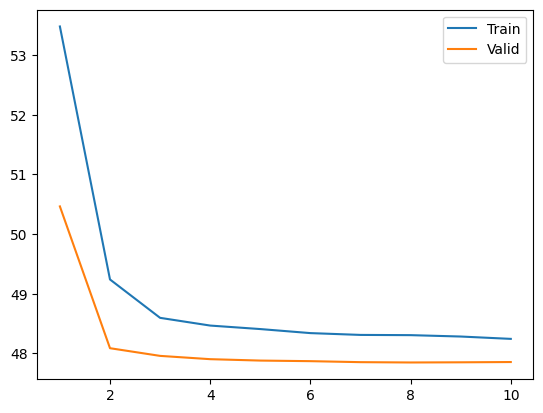

In [25]:
import seaborn as sns

def plot_loss_curves(epochs, train_loss, valid_loss):
    sns.lineplot(x=epochs, y=train_loss, label='Train')
    sns.lineplot(x=epochs, y=valid_loss, label='Valid')

plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)

In [26]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 20

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 48.5611029712094 47.87735085393129
Epoch 1 losses 48.39150497483024 47.828053893590635
Epoch 2 losses 48.29175745526508 47.82269908731634
Epoch 3 losses 48.17407027968729 47.852109239223914
Epoch 4 losses 48.06293893880167 47.89864451630785
Epoch 5 losses 47.92680110562925 47.96410992136115
Epoch 6 losses 47.77751786864514 48.08390324897917
Epoch 7 losses 47.66688951162453 48.14330566956592
Epoch 8 losses 47.52197260777768 48.17906782956934
Epoch 9 losses 47.36059912045797 48.29882079565478
Epoch 10 losses 47.241335429185334 48.44174187324735
Epoch 11 losses 47.0897549788837 48.60659695463218
Epoch 12 losses 46.93552492193119 48.72207512195874
Epoch 13 losses 46.8464299527063 48.94907420991438
Epoch 14 losses 46.69565086300842 49.13813268638882
Epoch 15 losses 46.52733727952236 49.34103110430269
Epoch 16 losses 46.39224418289885 49.63530362623011
Epoch 17 losses 46.21797886328511 50.148730054108995
Epoch 18 losses 46.13066763697032 50.24376213314976
Epoch 19 losses 45.97

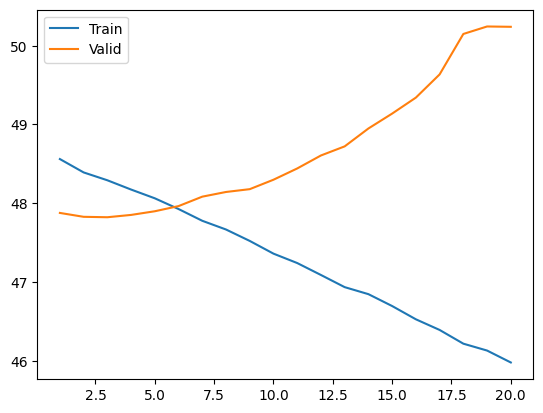

In [27]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)